In [ ]:
!pip install "numpy<2.0" scikit-learn pmdarima statsmodels joblib -U

In [ ]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.impute import SimpleImputer

#importa metricas
from sklearn import metrics

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import GridSearchCV
import joblib


In [ ]:
data = pd.read_csv('path/CIC2017_1132_features_extrated.csv', low_memory=False)
data.head()


,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Idle Min_ARIMA_forecast_2,Idle Min_ARIMA_forecast_3,Idle Min_ARIMA_forecast_4,Idle Min_ARIMA_forecast_5,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,1.104441e+06,979028.757647,926504.082905,893188.591632,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,9.790288e+05,926504.082905,893188.591632,873763.115207,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,9.265041e+05,893188.591632,873763.115207,860453.163786,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,8.931886e+05,873763.115207,860453.163786,851986.646158,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,8.737631e+05,860453.163786,851986.646158,846199.079134,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
data_copy = data.copy()

In [ ]:
feature_selected = 100
num_holder_feat = 1

In [ ]:
colunas_para_dropar = [coluna for coluna in data.columns if 'ARIMA'in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Dst Port_ARIMA_fitted_5', 'Dst Port_ARIMA_resid_5', 'Dst Port_ARIMA_forecast_1', 'Dst Port_ARIMA_forecast_2', 'Dst Port_ARIMA_forecast_3', 'Dst Port_ARIMA_forecast_4', 'Dst Port_ARIMA_forecast_5', 'Flow Duration_ARIMA_fitted_5', 'Flow Duration_ARIMA_resid_5', 'Flow Duration_ARIMA_forecast_1', 'Flow Duration_ARIMA_forecast_2', 'Flow Duration_ARIMA_forecast_3', 'Flow Duration_ARIMA_forecast_4', 'Flow Duration_ARIMA_forecast_5', 'Tot Fwd Pkts_ARIMA_fitted_5', 'Tot Fwd Pkts_ARIMA_resid_5', 'Tot Fwd Pkts_ARIMA_forecast_1', 'Tot Fwd Pkts_ARIMA_forecast_2', 'Tot Fwd Pkts_ARIMA_forecast_3', 'Tot Fwd Pkts_ARIMA_forecast_4', 'Tot Fwd Pkts_ARIMA_forecast_5', 'Tot Bwd Pkts_ARIMA_fitted_5', 'Tot Bwd Pkts_ARIMA_resid_5', 'Tot Bwd Pkts_ARIMA_forecast_1', 'Tot Bwd Pkts_ARIMA_forecast_2', 'Tot Bwd Pkts_ARIMA_forecast_3', 'Tot Bwd Pkts_ARIMA_forecast_4', 'Tot Bwd Pkts_ARIMA_forecast_5', 'TotLen Fwd Pkts_ARIMA_fitted_5', 'TotLen Fwd Pkts_ARIMA_resid_5', 'TotLen Fwd Pk

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
colunas_para_dropar = [coluna for coluna in data.columns if 'EMA'in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Dst Port_EMA_3', 'Dst Port_EMA_6', 'Dst Port_EMA_9', 'Dst Port_EMA_12', 'Flow Duration_EMA_3', 'Flow Duration_EMA_6', 'Flow Duration_EMA_9', 'Flow Duration_EMA_12', 'Tot Fwd Pkts_EMA_3', 'Tot Fwd Pkts_EMA_6', 'Tot Fwd Pkts_EMA_9', 'Tot Fwd Pkts_EMA_12', 'Tot Bwd Pkts_EMA_3', 'Tot Bwd Pkts_EMA_6', 'Tot Bwd Pkts_EMA_9', 'Tot Bwd Pkts_EMA_12', 'TotLen Fwd Pkts_EMA_3', 'TotLen Fwd Pkts_EMA_6', 'TotLen Fwd Pkts_EMA_9', 'TotLen Fwd Pkts_EMA_12', 'TotLen Bwd Pkts_EMA_3', 'TotLen Bwd Pkts_EMA_6', 'TotLen Bwd Pkts_EMA_9', 'TotLen Bwd Pkts_EMA_12', 'Fwd Pkt Len Max_EMA_3', 'Fwd Pkt Len Max_EMA_6', 'Fwd Pkt Len Max_EMA_9', 'Fwd Pkt Len Max_EMA_12', 'Fwd Pkt Len Min_EMA_3', 'Fwd Pkt Len Min_EMA_6', 'Fwd Pkt Len Min_EMA_9', 'Fwd Pkt Len Min_EMA_12', 'Fwd Pkt Len Mean_EMA_3', 'Fwd Pkt Len Mean_EMA_6', 'Fwd Pkt Len Mean_EMA_9', 'Fwd Pkt Len Mean_EMA_12', 'Fwd Pkt Len Std_EMA_3', 'Fwd Pkt Len Std_EMA_6', 'Fwd Pkt Len Std_EMA_9', 'Fwd Pkt Len Std_EMA_12', 'Bwd Pkt L

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
colunas_para_dropar = [coluna for coluna in data.columns if 'SMA'in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Dst Port_SMA_3', 'Dst Port_SMA_6', 'Dst Port_SMA_9', 'Dst Port_SMA_12', 'Flow Duration_SMA_3', 'Flow Duration_SMA_6', 'Flow Duration_SMA_9', 'Flow Duration_SMA_12', 'Tot Fwd Pkts_SMA_3', 'Tot Fwd Pkts_SMA_6', 'Tot Fwd Pkts_SMA_9', 'Tot Fwd Pkts_SMA_12', 'Tot Bwd Pkts_SMA_3', 'Tot Bwd Pkts_SMA_6', 'Tot Bwd Pkts_SMA_9', 'Tot Bwd Pkts_SMA_12', 'TotLen Fwd Pkts_SMA_3', 'TotLen Fwd Pkts_SMA_6', 'TotLen Fwd Pkts_SMA_9', 'TotLen Fwd Pkts_SMA_12', 'TotLen Bwd Pkts_SMA_3', 'TotLen Bwd Pkts_SMA_6', 'TotLen Bwd Pkts_SMA_9', 'TotLen Bwd Pkts_SMA_12', 'Fwd Pkt Len Max_SMA_3', 'Fwd Pkt Len Max_SMA_6', 'Fwd Pkt Len Max_SMA_9', 'Fwd Pkt Len Max_SMA_12', 'Fwd Pkt Len Min_SMA_3', 'Fwd Pkt Len Min_SMA_6', 'Fwd Pkt Len Min_SMA_9', 'Fwd Pkt Len Min_SMA_12', 'Fwd Pkt Len Mean_SMA_3', 'Fwd Pkt Len Mean_SMA_6', 'Fwd Pkt Len Mean_SMA_9', 'Fwd Pkt Len Mean_SMA_12', 'Fwd Pkt Len Std_SMA_3', 'Fwd Pkt Len Std_SMA_6', 'Fwd Pkt Len Std_SMA_9', 'Fwd Pkt Len Std_SMA_12', 'Bwd Pkt L

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
label = data['Label']
len(label)

16497

In [ ]:
dt = data.copy()
dt.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
y = dt.iloc[:, -1]
x = dt.copy().drop(['Label'], axis=1)
y = y.fillna(0)
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [ ]:
selector = SelectKBest(score_func=f_classif, k=feature_selected)  # Mantendo as 23 melhores
newfeature = selector.fit_transform(x, y)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 43  44  45  46  47  48 194] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
cols = selector.get_support(indices=True)
newfeature = dt.iloc[:,cols]


In [ ]:
print(f'Linhas: {newfeature.shape[0]}')
print(f'Colunas: {newfeature.shape[1]}')

Linhas: 16497
Colunas: 100


In [ ]:
newfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16497 entries, 0 to 16496
Data columns (total 100 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dst Port                    16497 non-null  int64  
 1   Flow Duration               16497 non-null  int64  
 2   Bwd Pkt Len Max             16497 non-null  int64  
 3   Bwd Pkt Len Mean            16497 non-null  float64
 4   Bwd Pkt Len Std             16497 non-null  float64
 5   Flow IAT Mean               16497 non-null  float64
 6   Flow IAT Std                16497 non-null  float64
 7   Flow IAT Max                16497 non-null  int64  
 8   Flow IAT Min                16497 non-null  int64  
 9   Fwd IAT Tot                 16497 non-null  int64  
 10  Fwd IAT Mean                16497 non-null  float64
 11  Fwd IAT Std                 16497 non-null  float64
 12  Fwd IAT Max                 16497 non-null  int64  
 13  Fwd IAT Min                 16

In [ ]:
rotulos = newfeature.columns
print(rotulos)

Index(['Dst Port', 'Flow Duration', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Max', 'Bwd IAT Min', 'Pkt Len Max', 'Pkt Len Std',
       'Bwd Seg Size Avg', 'Init Fwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Fwd PSH Flags_j10', 'Fwd PSH Flags_j10_mean',
       'Fwd PSH Flags_j20', 'Fwd PSH Flags_j20_mean', 'Fwd PSH Flags_j30',
       'Fwd PSH Flags_j30_mean', 'Fwd PSH Flags_entropy_j30',
       'Fwd PSH Flags_j40', 'Fwd PSH Flags_j40_mean',
       'Fwd PSH Flags_entropy_j40', 'Fwd PSH Flags_j50',
       'Fwd PSH Flags_j50_mean', 'Fwd PSH Flags_entropy_j50',
       'FIN Flag Cnt_j20', 'FIN Flag Cnt_entropy_j20', 'FIN Flag Cnt_j30',
       'FIN Flag Cnt_j30_mean', 'FIN F

In [ ]:
dt = pd.concat([newfeature, label], axis=1)
dt.head()

,Dst Port,Flow Duration,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,...,URG Flag Cnt_j30,URG Flag Cnt_j30_mean,URG Flag Cnt_j40,URG Flag Cnt_j40_mean,URG Flag Cnt_j50,URG Flag Cnt_j50_mean,Bwd IAT Mean_holder_j5,Fwd Seg Size Min_holder_j5,Active Min_holder_j5,Label
0,80,38308,6,6.000000,0.000000,38308.000000,0.000000,38308,38308,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,163,65.200000,89.278777,31.933333,25.510409,73,0,479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,1575,525.000000,813.326503,73.000000,204.960972,810,1,1095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,3069,555.000000,977.480342,543.071429,2519.931377,13391,0,15206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,1576,525.333333,813.842901,78.000000,207.000929,794,1,1092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
# Supondo que df_renomeado contém seu DataFrame com as colunas já alteradas
try:
    dt.to_csv('/poseiddon/GROUP A/CONFIGURATION 4/New_feature_selected_holder_arima_features.csv', index=False)
    print("\nDataset salvo com sucesso como 'holder_features.csv'")
except Exception as e:
    print(f"\nOcorreu um erro ao salvar o CSV: {e}")


Dataset salvo com sucesso como 'holder_features.csv'


In [ ]:
feat = pd.read_csv('/poseiddon/GROUP A/CONFIGURATION 4/New_feature_selected_holder_arima_features.csv')

In [ ]:
# Obter rótulos das classes

names = ['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']
# Map string labels to numerical values before getting unique values
label_map = {'Benign': 0, 'DoS attacks-Slowloris': 1, 'DoS attacks-SlowHTTPTest': 2}
dt['Label'] = dt['Label'].map(label_map)

classes = [names[i] for i in dt['Label'].unique()]
index = np.arange(len(classes))
classes

['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']

In [ ]:
# Criando rotulos para dados benignos e dados maliciosos Slowloris

# Unificando nomenclatura para normal em todos os tipos de trafego normal
dt['Label'] = dt['Label'].replace(['Benign'], 0)
dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 1)
dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
dt['Label'].value_counts()

,count
Label,
0,5499
1,5499
2,5499


In [ ]:
# Atribuindo o label ao eixo y e as outras features do dataframe x_data, sem o label.

y = dt['Label']
x_data = dt.drop(['Label'],axis=1)
x_data.head()

,Dst Port,Flow Duration,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,...,URG Flag Cnt_j20_mean,URG Flag Cnt_j30,URG Flag Cnt_j30_mean,URG Flag Cnt_j40,URG Flag Cnt_j40_mean,URG Flag Cnt_j50,URG Flag Cnt_j50_mean,Bwd IAT Mean_holder_j5,Fwd Seg Size Min_holder_j5,Active Min_holder_j5
0,80,38308,6,6.000000,0.000000,38308.000000,0.000000,38308,38308,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,389,479,163,65.200000,89.278777,31.933333,25.510409,73,0,479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88,1095,1575,525.000000,813.326503,73.000000,204.960972,810,1,1095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,389,15206,3069,555.000000,977.480342,543.071429,2519.931377,13391,0,15206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88,1092,1576,525.333333,813.842901,78.000000,207.000929,794,1,1092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.value_counts()

,count
Label,
0,5499
1,5499
2,5499


In [ ]:
inputs = len(dt.columns)
print('Número de entradas: ', inputs)

Número de entradas:  101


In [ ]:
y = label
x = newfeature

In [ ]:
x = x.replace([np.inf, -np.inf], np.nan)
y = y.fillna(0)
x = x.fillna(0)

In [ ]:
corr = x.corr()
corr

,Dst Port,Flow Duration,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,...,URG Flag Cnt_j20_mean,URG Flag Cnt_j30,URG Flag Cnt_j30_mean,URG Flag Cnt_j40,URG Flag Cnt_j40_mean,URG Flag Cnt_j50,URG Flag Cnt_j50_mean,Bwd IAT Mean_holder_j5,Fwd Seg Size Min_holder_j5,Active Min_holder_j5
Dst Port,1.000000,-0.247321,-0.074426,-0.077434,-0.085465,-0.183693,-0.170213,-0.201613,-0.069912,-0.246664,...,-0.034109,-0.039109,-0.039109,-0.037178,-0.037178,-0.037302,-0.037302,-0.179161,-0.269837,0.078968
Flow Duration,-0.247321,1.000000,-0.032897,-0.100361,-0.107500,0.617231,0.685457,0.820480,-0.127743,0.999408,...,-0.233230,-0.227371,-0.227371,-0.224506,-0.224506,-0.220834,-0.220834,0.312912,0.249043,-0.382490
Bwd Pkt Len Max,-0.074426,-0.032897,1.000000,0.910834,0.897899,-0.243656,-0.201411,-0.184732,-0.116722,-0.039390,...,0.166247,0.168958,0.168958,0.167200,0.167200,0.166883,0.166883,-0.304617,-0.374762,0.111779
Bwd Pkt Len Mean,-0.077434,-0.100361,0.910834,1.000000,0.867636,-0.244229,-0.201009,-0.183930,-0.113754,-0.104652,...,0.201831,0.204614,0.204614,0.203594,0.203594,0.204132,0.204132,-0.335741,-0.344172,0.136753
Bwd Pkt Len Std,-0.085465,-0.107500,0.897899,0.867636,1.000000,-0.266166,-0.222621,-0.222263,-0.125842,-0.113187,...,0.312657,0.316897,0.316897,0.315702,0.315702,0.315657,0.315657,-0.381974,-0.361508,0.158570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
URG Flag Cnt_j50,-0.037302,-0.220834,0.166883,0.204132,0.315657,-0.126191,-0.154317,-0.171856,0.258719,-0.221045,...,0.951874,0.977626,0.977626,0.993615,0.993615,1.000000,1.000000,-0.152325,-0.003140,0.284515
URG Flag Cnt_j50_mean,-0.037302,-0.220834,0.166883,0.204132,0.315657,-0.126191,-0.154317,-0.171856,0.258719,-0.221045,...,0.951874,0.977626,0.977626,0.993615,0.993615,1.000000,1.000000,-0.152325,-0.003140,0.284515
Bwd IAT Mean_holder_j5,-0.179161,0.312912,-0.304617,-0.335741,-0.381974,0.345226,0.254165,0.278185,0.231347,0.313356,...,-0.126005,-0.136498,-0.136498,-0.144534,-0.144534,-0.152325,-0.152325,1.000000,0.432375,-0.135205
Fwd Seg Size Min_holder_j5,-0.269837,0.249043,-0.374762,-0.344172,-0.361508,0.267104,0.184327,0.244112,0.185952,0.252211,...,-0.001059,-0.000792,-0.000792,-0.001474,-0.001474,-0.003140,-0.003140,0.432375,1.000000,-0.080880


In [ ]:
corr = x.corr()
colormap = sns.diverging_palette(10, 150, as_cmap = True)
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            cmap = colormap, linewidths=0.5, linecolor='white')
plt.title('Corelação de Recursos', y=1.05, size=16)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dt['Label'] = dt['Label'].replace(['Benign'], 0)
dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 1)
dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
dt['Label'].value_counts()

,count
Label,
0,5499
1,5499
2,5499


In [ ]:
y = dt['Label']
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [ ]:
x = x.replace([np.inf, -np.inf], np.nan)
y = y.fillna(0)
x = x.fillna(0)

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# Seperação dos dados em teino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

print(f'Treinamento: {x_train.shape[0]}  ---  {(x_train.shape[0]/x.shape[0])*100:.2f}%')
print(f'Teste: {x_test.shape[0]}  ---  {(x_test.shape[0]/x.shape[0])*100:.2f}%')

Treinamento: 13197  ---  80.00%
Teste: 3300  ---  20.00%


In [ ]:
# Importamos as bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras
import tensorflow as tf
from keras.metrics import Precision, Recall, F1Score, SparseCategoricalAccuracy # [1]

In [ ]:
num_classes = len(np.unique(y_train))
print(num_classes)

3


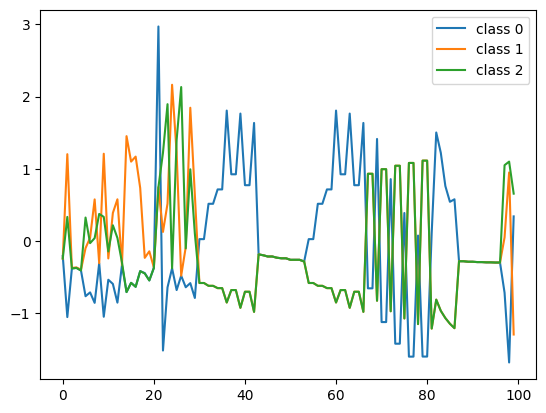

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
metricas_scoring = {
    "Accuracy": "accuracy",
    "Precision": "precision_weighted",
    "Recall": "recall_weighted",
    "F1-Score": "f1_weighted"
}
all_scores_cv = {nome_metrica: {} for nome_metrica in metricas_scoring.keys()}

In [ ]:
y_train_lstm = y_train.copy()
y_test_lstm = y_test.copy()
x_train_lstm = x_train.copy()
x_test_lstm = x_test.copy()

In [ ]:
x_train_lstm = x_train_lstm.reshape((x_train_lstm.shape[0], x_train_lstm.shape[1], 1))
x_test_lstm = x_test_lstm.reshape((x_test_lstm.shape[0], x_test_lstm.shape[1], 1))

In [ ]:
num_classes = len(np.unique(y_train))
print(num_classes)

3


In [ ]:
def make_model(input_shape, dropout_rate=0.5):
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv1 = keras.layers.Dropout(rate=dropout_rate)(conv1)

  conv2 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv2 = keras.layers.Dropout(rate=dropout_rate)(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  gap = keras.layers.Dropout(rate=dropout_rate)(gap)

  output_layer = keras.layers.Dense(num_classes, activation="sigmoid")(gap)

  return keras.models.Model(inputs=input_layer, outputs=output_layer)


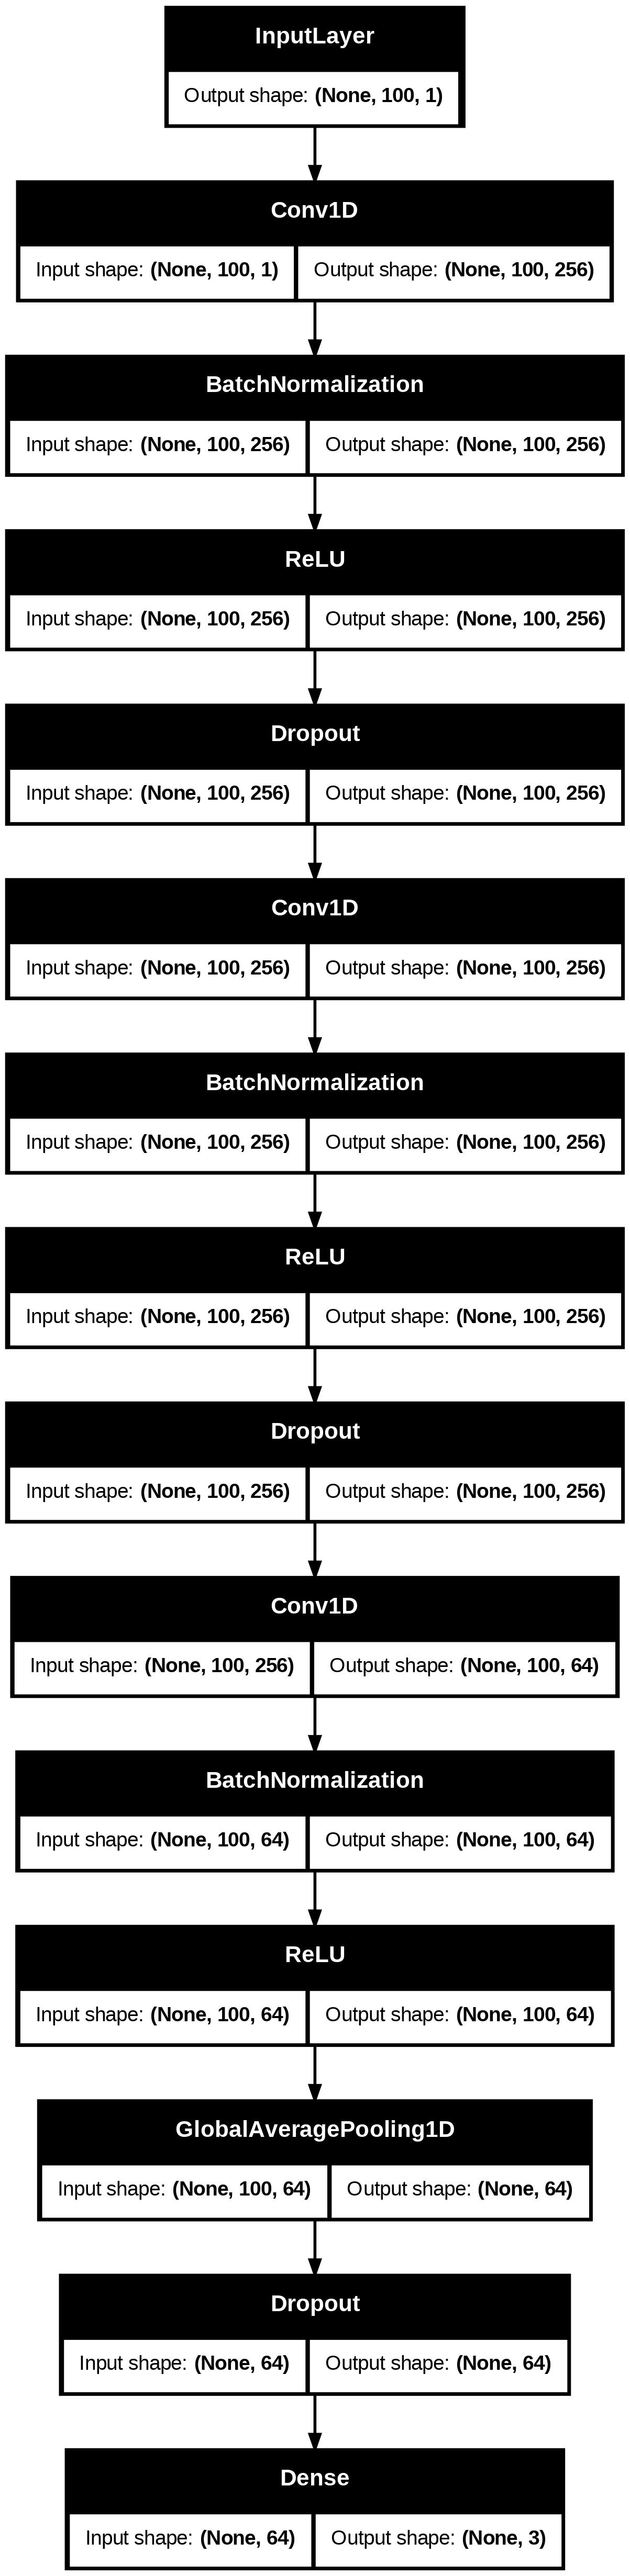

In [ ]:
model = make_model(input_shape=x_train_lstm.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
n_folds = 10
epochs = 50
batch_size = 32

In [ ]:
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
loss_per_fold = []

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=30, min_lr=0.0005
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", mode='min', patience=30, restore_best_weights=True, verbose=1),
]

In [ ]:
if len(y_train_lstm.shape) == 1:
    y_train_lstm = np.expand_dims(y_train_lstm, axis=-1)

if len(y_test_lstm.shape) == 1:
    y_test_lstm = np.expand_dims(y_test_lstm, axis=-1)

print(f"Novo shape de y_train: {y_train_lstm.shape}")


Novo shape de y_train: (13197, 1)


In [ ]:
from tqdm import tqdm

In [ ]:
fold_no = 1
for train_index, val_index in tqdm(kf.split(x_train_lstm, y_train_lstm)):
    print(f'----------------- Fold {fold_no}/{n_folds} -----------------')

    X_train_fold, X_val_fold = x_train_lstm[train_index], y_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]
    model = make_model(input_shape=x_train_lstm.shape[1:])

    model.compile(
      optimizer='adam',
      loss="sparse_categorical_crossentropy",
      metrics=[
          SparseCategoricalAccuracy(name='accuracy'),
      ],
    )

    print('Treinando...')
    history = model.fit(
      x_train_lstm,
      y_train_lstm,
      batch_size=batch_size,
      epochs=epochs,
      callbacks=callbacks,
      validation_split=0.2,
      verbose=1,
    )

    print('Avaliando performance...')
    loss, accuracy_val = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    y_pred_probs = model.predict(X_val_fold)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels = np.squeeze(Y_val_fold)

    print(f'Loss: {loss:.4f}, Accuracy: {accuracy_val:.4f}')

    fold_no += 1


0it [00:00, ?it/s]

----------------- Fold 1/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.6299 - loss: 0.8085 - val_accuracy: 0.6106 - val_loss: 1.1800 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8552 - loss: 0.4004 - val_accuracy: 0.9432 - val_loss: 0.2045 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8980 - loss: 0.2906 - val_accuracy: 0.9527 - val_loss: 0.1567 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9201 - loss: 0.2331 - val_accuracy: 0.9318 - val_loss: 0.1547 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9283 - loss: 0.2173 - val_accuracy: 0.9636 - val_loss: 0.1132 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9353 - loss: 0.1914 - val_accuracy: 0.9754 - val_loss: 0.1044 - learning_rate: 0.0010
Epoch 7/50
330/33

1it [11:34, 694.05s/it]

Loss: 17.0352, Accuracy: 0.3030
----------------- Fold 2/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.6153 - loss: 0.8240 - val_accuracy: 0.6227 - val_loss: 1.0655 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.8535 - loss: 0.4016 - val_accuracy: 0.9352 - val_loss: 0.2212 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9112 - loss: 0.2697 - val_accuracy: 0.9553 - val_loss: 0.1435 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9177 - loss: 0.2387 - val_accuracy: 0.9689 - val_loss: 0.1086 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9303 - loss: 0.2014 - val_accuracy: 0.9727 - val_loss: 0.0965 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9423 - loss: 0.1742 - val_accuracy: 0.9447 - val_loss: 0.1467 - learnin

2it [22:32, 672.94s/it]

Loss: 6.4579, Accuracy: 0.6742
----------------- Fold 3/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.6274 - loss: 0.8089 - val_accuracy: 0.3996 - val_loss: 1.0501 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.8611 - loss: 0.3889 - val_accuracy: 0.9443 - val_loss: 0.1932 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9007 - loss: 0.2877 - val_accuracy: 0.9591 - val_loss: 0.1393 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9296 - loss: 0.2231 - val_accuracy: 0.9606 - val_loss: 0.1170 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9361 - loss: 0.2043 - val_accuracy: 0.9735 - val_loss: 0.0987 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9402 - loss: 0.1746 - val_accuracy: 0.9795 - val_loss: 0.0851 - learning

3it [33:13, 658.41s/it]

Loss: 15.2440, Accuracy: 0.3258
----------------- Fold 4/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.6237 - loss: 0.8108 - val_accuracy: 0.5977 - val_loss: 1.2668 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8668 - loss: 0.3812 - val_accuracy: 0.9511 - val_loss: 0.1764 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9081 - loss: 0.2693 - val_accuracy: 0.9652 - val_loss: 0.1223 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9238 - loss: 0.2285 - val_accuracy: 0.9739 - val_loss: 0.1085 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9265 - loss: 0.2108 - val_accuracy: 0.9133 - val_loss: 0.2349 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9367 - loss: 0.1863 - val_accuracy: 0.9655 - val_loss: 0.1015 - learnin

4it [44:15, 659.74s/it]

Loss: 9.0147, Accuracy: 0.3447
----------------- Fold 5/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.6209 - loss: 0.8152 - val_accuracy: 0.6383 - val_loss: 1.0195 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.8636 - loss: 0.3854 - val_accuracy: 0.9436 - val_loss: 0.1905 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9031 - loss: 0.2815 - val_accuracy: 0.9394 - val_loss: 0.2025 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9247 - loss: 0.2241 - val_accuracy: 0.9746 - val_loss: 0.1102 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9264 - loss: 0.2075 - val_accuracy: 0.9644 - val_loss: 0.1059 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9389 - loss: 0.1835 - val_accuracy: 0.9708 - val_loss: 0.0920 - learning

5it [55:33, 666.53s/it]

Loss: 18.8579, Accuracy: 0.3379
----------------- Fold 6/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.6127 - loss: 0.8474 - val_accuracy: 0.4326 - val_loss: 1.4598 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8636 - loss: 0.3885 - val_accuracy: 0.9447 - val_loss: 0.1700 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9122 - loss: 0.2702 - val_accuracy: 0.9674 - val_loss: 0.1191 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9220 - loss: 0.2201 - val_accuracy: 0.9436 - val_loss: 0.1800 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9290 - loss: 0.2070 - val_accuracy: 0.9515 - val_loss: 0.1496 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9449 - loss: 0.1674 - val_accuracy: 0.9799 - val_loss: 0.0868 - learnin

6it [1:07:24, 681.57s/it]

Loss: 14.1363, Accuracy: 0.3288
----------------- Fold 7/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.6244 - loss: 0.8265 - val_accuracy: 0.4292 - val_loss: 1.3507 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.8699 - loss: 0.3785 - val_accuracy: 0.9379 - val_loss: 0.2046 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9095 - loss: 0.2807 - val_accuracy: 0.9504 - val_loss: 0.1512 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9231 - loss: 0.2333 - val_accuracy: 0.9636 - val_loss: 0.1263 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9293 - loss: 0.2080 - val_accuracy: 0.9712 - val_loss: 0.1005 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9317 - loss: 0.1940 - val_accuracy: 0.9705 - val_loss: 0.0942 - learnin

7it [1:19:19, 692.52s/it]

Loss: 8.7857, Accuracy: 0.3455
----------------- Fold 8/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.6386 - loss: 0.7857 - val_accuracy: 0.6098 - val_loss: 1.2333 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.8592 - loss: 0.3900 - val_accuracy: 0.9447 - val_loss: 0.1828 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9014 - loss: 0.2862 - val_accuracy: 0.9591 - val_loss: 0.1296 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9194 - loss: 0.2304 - val_accuracy: 0.9511 - val_loss: 0.1205 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9286 - loss: 0.2060 - val_accuracy: 0.9697 - val_loss: 0.1104 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9406 - loss: 0.1776 - val_accuracy: 0.9708 - val_loss: 0.0895 - learning

8it [1:31:13, 699.48s/it]

Loss: 31.2949, Accuracy: 0.3313
----------------- Fold 9/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.6430 - loss: 0.8008 - val_accuracy: 0.4258 - val_loss: 1.3155 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8527 - loss: 0.3972 - val_accuracy: 0.9439 - val_loss: 0.1922 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9053 - loss: 0.2758 - val_accuracy: 0.9511 - val_loss: 0.1664 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9209 - loss: 0.2332 - val_accuracy: 0.9640 - val_loss: 0.1065 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9266 - loss: 0.2033 - val_accuracy: 0.9606 - val_loss: 0.1200 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9358 - loss: 0.1845 - val_accuracy: 0.9655 - val_loss: 0.0875 - learnin

9it [1:42:52, 699.29s/it]

Loss: 7.8090, Accuracy: 0.3556
----------------- Fold 10/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.6413 - loss: 0.7999 - val_accuracy: 0.6784 - val_loss: 0.8813 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8579 - loss: 0.3947 - val_accuracy: 0.9314 - val_loss: 0.2045 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9088 - loss: 0.2744 - val_accuracy: 0.9545 - val_loss: 0.1368 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9273 - loss: 0.2221 - val_accuracy: 0.9591 - val_loss: 0.1232 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9256 - loss: 0.2136 - val_accuracy: 0.9746 - val_loss: 0.0955 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9390 - loss: 0.1755 - val_accuracy: 0.9795 - val_loss: 0.0892 - learnin

10it [1:54:41, 688.15s/it]

Loss: 14.7261, Accuracy: 0.6801


In [ ]:
modelLSTM = keras.models.load_model("best_model.keras")
test_loss, test_acc = model.evaluate(x_test_lstm, y_test_lstm)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9964 - loss: 0.0153
Test accuracy 0.996363639831543
Test loss 0.017824459820985794


In [ ]:
from sklearn.metrics import classification_report

y_pred_probs = modelLSTM.predict(x_test_lstm)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.squeeze(y_test_lstm)

report = classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)'],
    digits=4,
    zero_division=0 
)

print("\n--- Relatório de Classificação Completo ---")
print(report)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

--- Relatório de Classificação Completo ---
                      precision    recall  f1-score   support

          Benign (0)     0.9963    1.0000    0.9981      1068
   DoS-Slowloris (1)     0.9964    0.9947    0.9956      1126
DoS-SlowHTTPTest (2)     0.9982    0.9964    0.9973      1106

            accuracy                         0.9970      3300
           macro avg     0.9970    0.9970    0.9970      3300
        weighted avg     0.9970    0.9970    0.9970      3300



Scores de CV do LSTM coletados e salvos em 'all_scores_cv_teste'.


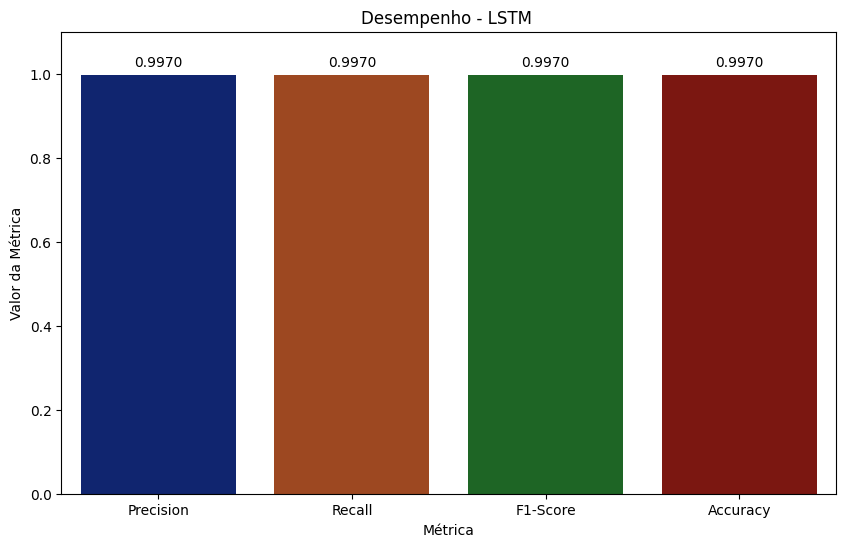

In [ ]:
precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_labels, y_pred_labels)

lstm_scores_temp = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
for nome_metrica in metricas_scoring.keys():
    scores_lstm = np.array(lstm_scores_temp[nome_metrica])

    all_scores_cv[nome_metrica]['LSTM'] = scores_lstm

print(f"Scores de CV do {'LSTM'} coletados e salvos em 'all_scores_cv_teste'.")

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}
df_metricas = pd.DataFrame(metricas)
df_metrics_lstm = df_metricas.copy()
df_metrics_lstm = df_metrics_lstm.insert(loc=0, column='Modelo', value='LSTM')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

plt.title('Desempenho - LSTM ')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.show()

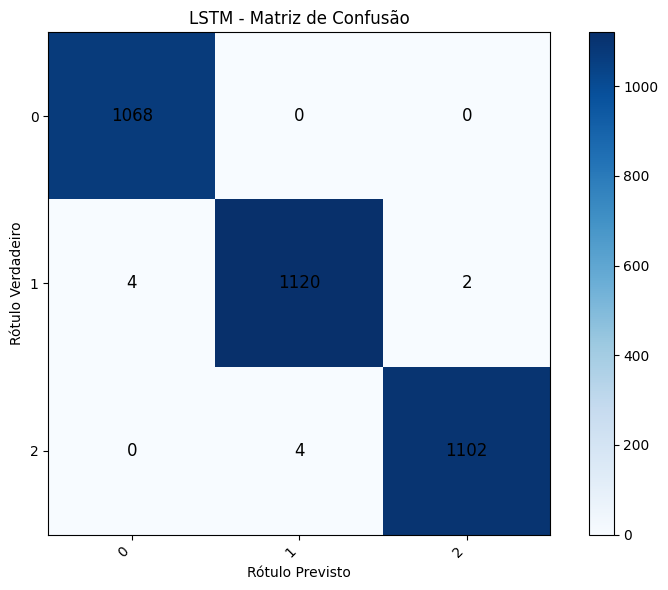

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.squeeze(y_test_lstm)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha='center', va='center',
                 color='black', fontsize=12) 

plt.title('LSTM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(classes)), labels=classes)

plt.tight_layout() 
plt.show()

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


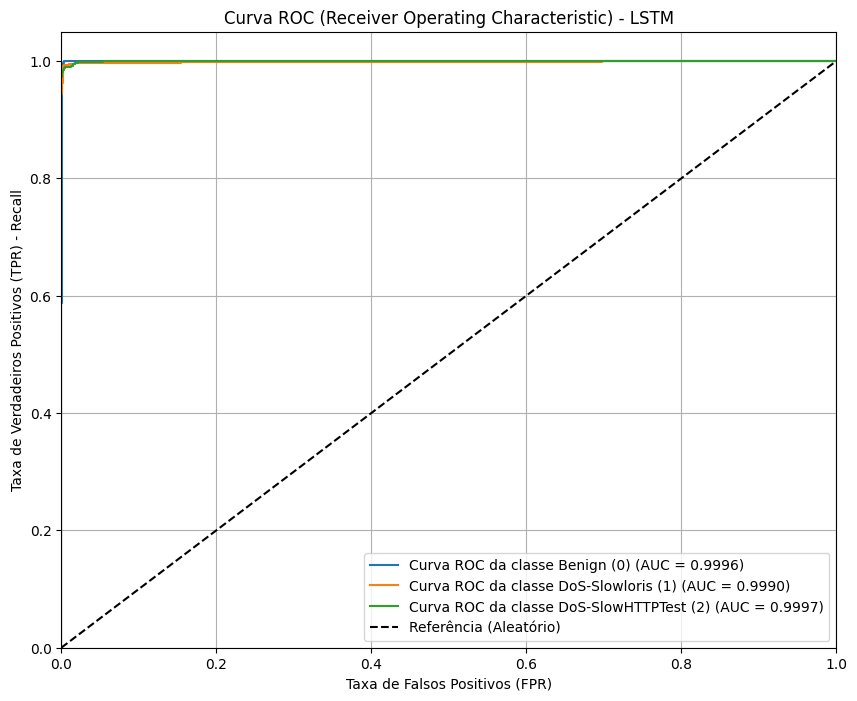

In [ ]:
from sklearn.preprocessing import label_binarize

class_names = [0, 1, 2]
n_classes = len(class_names)

legend_names = ['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)']

y_pred_prob = model.predict(x_test_lstm) 
y_true_labels = np.squeeze(y_test_lstm)
y_test_bin = label_binarize(y_true_labels, classes=class_names)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {legend_names[i]} (AUC = {roc_auc[i]:.4f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) - Recall')
plt.title('Curva ROC (Receiver Operating Characteristic) - LSTM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
modelMLP = MLPClassifier(hidden_layer_sizes=(256,),
                        max_iter = 1000,activation = 'tanh',
                        solver = 'adam',
                        learning_rate_init = 0.05, early_stopping = True,
                        verbose=True)


In [ ]:
modelMLP.fit(x_train, y_train)

Iteration 1, loss = 0.24246298
Validation score: 0.986364
Iteration 2, loss = 0.04303935
Validation score: 0.996212
Iteration 3, loss = 0.04171539
Validation score: 0.993182
Iteration 4, loss = 0.03723131
Validation score: 0.971212
Iteration 5, loss = 0.04885229
Validation score: 0.993182
Iteration 6, loss = 0.04672077
Validation score: 0.995455
Iteration 7, loss = 0.03916616
Validation score: 0.989394
Iteration 8, loss = 0.04481840
Validation score: 0.993182
Iteration 9, loss = 0.02422295
Validation score: 0.993939
Iteration 10, loss = 0.04070261
Validation score: 0.994697
Iteration 11, loss = 0.04219601
Validation score: 0.986364
Iteration 12, loss = 0.07346559
Validation score: 0.989394
Iteration 13, loss = 0.06285421
Validation score: 0.986364
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


,hidden_layer_sizes,"(256,)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.05
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


In [ ]:
previsoes_algoritmos = {}

In [ ]:
previsoes_algoritmos['LSTM'] = y_pred_labels

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
nome_modelo = "MLP"
X_dados = x
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelMLP, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=1, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    8.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.0s remaining:    4.0s


Scores de CV do MLP coletados e salvos em 'all_scores_cv_teste'.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.2s finished


In [ ]:
predictsMLP = modelMLP.predict(x_test)

accuracyMLP = accuracy_score(y_test, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y_test, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.9927272727272727

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9926    0.9991    0.9958      1068
           1     0.9937    0.9858    0.9897      1126
           2     0.9919    0.9937    0.9928      1106

    accuracy                         0.9927      3300
   macro avg     0.9927    0.9928    0.9928      3300
weighted avg     0.9927    0.9927    0.9927      3300



In [ ]:
print(f'Scores validação cruzada MLP: {scores}')
print(f'Média dos scores: {scores.mean()}')
print(f'Desvio padrão dos scores: {scores.std()}')

Scores validação cruzada MLP: [0.99575698 0.98666581 0.9902964  0.99151504 0.99575923 0.99394158
 0.99271542 0.99150667 0.9957539  0.99514854]
Média dos scores: 0.9929059569504826
Desvio padrão dos scores: 0.00283125735659251


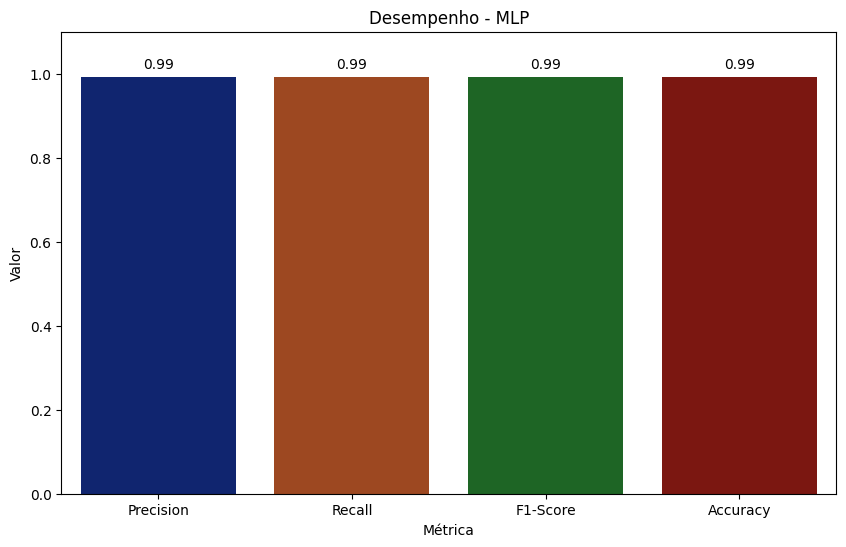

In [ ]:
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_mlp = df_metricas.copy()
df_metrics_mlp.insert(loc=0, column='Modelo', value='MLP')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt # Importe para customizar o gráfico
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

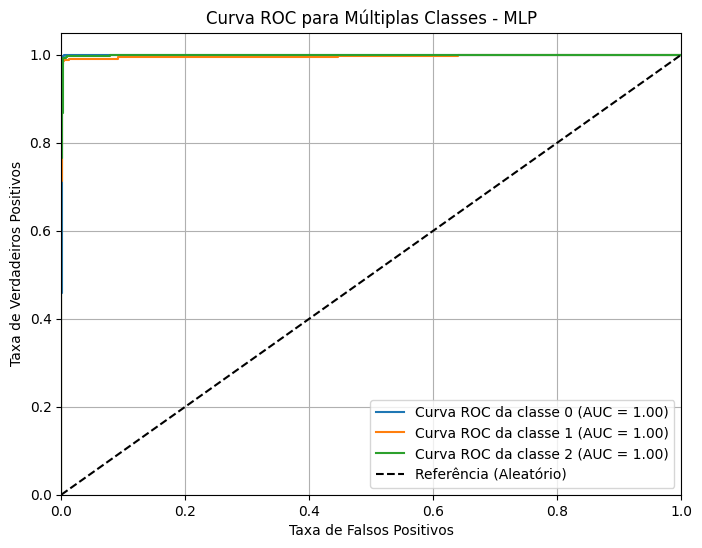

In [ ]:
class_names = modelMLP.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
previsoes_algoritmos['MLP'] = y_pred

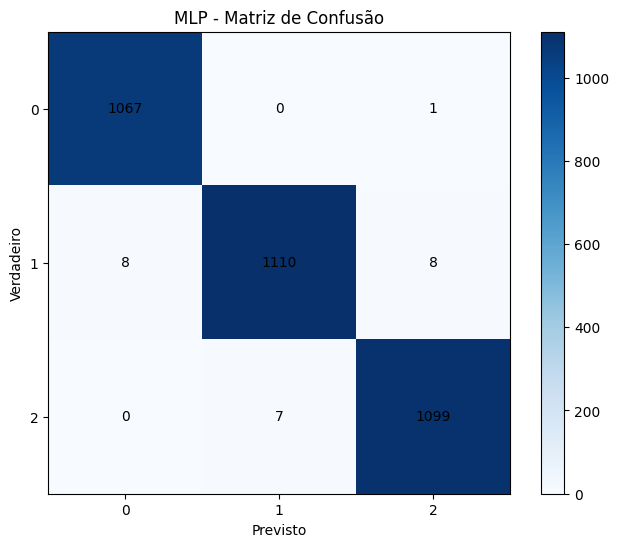

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

nome_modelo = "Naive Bayes"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(nb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

scores_nb = scores



NameError: name 'x_train' is not defined

In [ ]:
print(f'Scores validação cruzada MLP: {scores_nb}')
print(f'Média dos scores: {scores_nb.mean()}')
print(f'Desvio padrão dos scores: {scores_nb.std()}')

Scores validação cruzada MLP: [0.86130684 0.86538666 0.87430752 0.88113283 0.87700918 0.86310045
 0.87398814 0.88494184 0.86971603 0.87695625]
Média dos scores: 0.8727845750666617
Desvio padrão dos scores: 0.007390375176103528


In [ ]:
predictsNB = nb.predict(x_test)

accuracyNB = accuracy_score(y_test, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y_test, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.8778787878787879

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9989    0.8670    0.9283      1068
           1     0.7931    0.9734    0.8740      1126
           2     0.8829    0.7911    0.8345      1106

    accuracy                         0.8779      3300
   macro avg     0.8916    0.8772    0.8789      3300
weighted avg     0.8898    0.8779    0.8784      3300



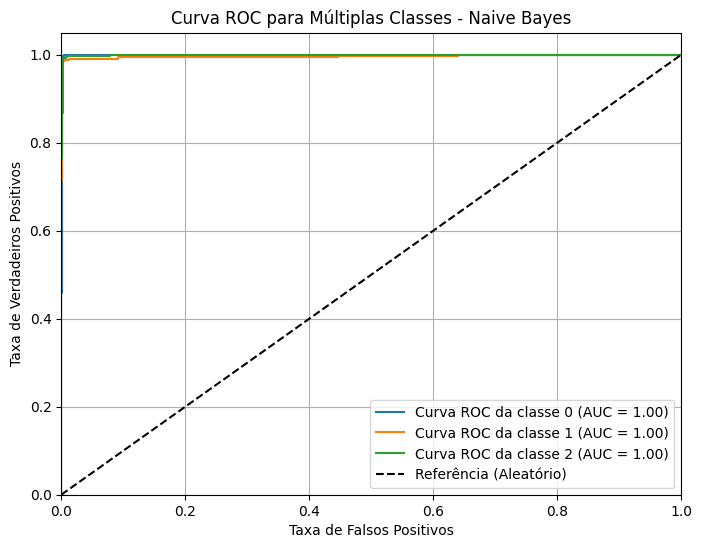

In [ ]:
class_names = nb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

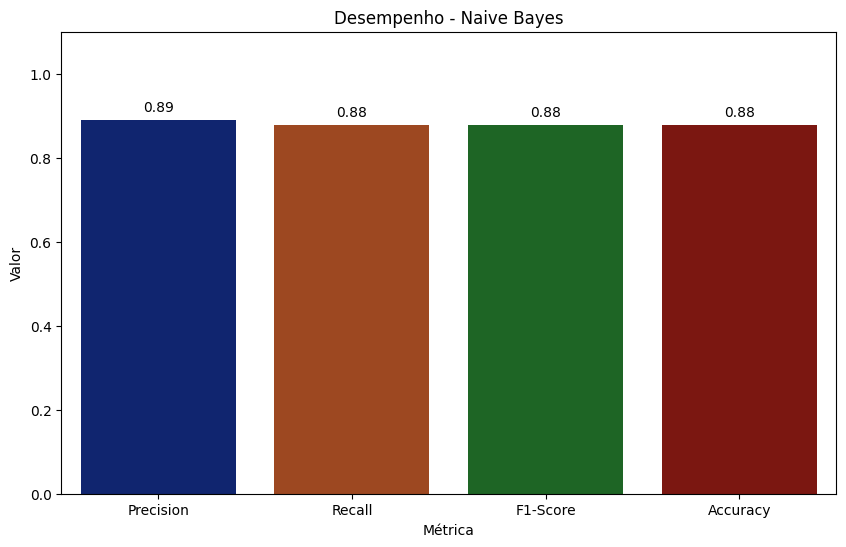

In [ ]:
y_pred = predictsNB
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_nb = df_metricas.copy()
df_metrics_nb.insert(loc=0, column='Modelo', value='Naive Bayes')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

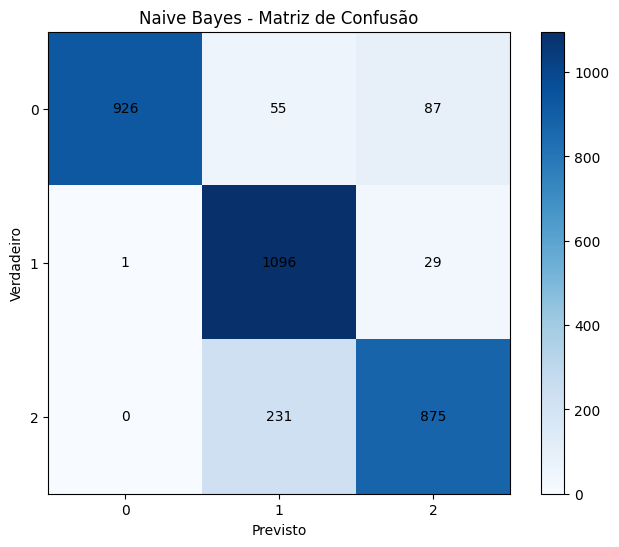

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Naive Bayes - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(
  criterion='entropy',
  max_depth=10,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=None
)

modelDT.fit(x_train, y_train)

nome_modelo = "Decision Tree"
X_dados = x 
Y_dados = y 
for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelDT, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

scores_DT = scores
print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

print(f'Scores validação cruzada MLP: {scores_DT}')
print(f'Média dos scores: {scores_DT.mean()}')
print(f'Desvio padrão dos scores: {scores_DT.std()}')


NameError: name 'x_train' is not defined

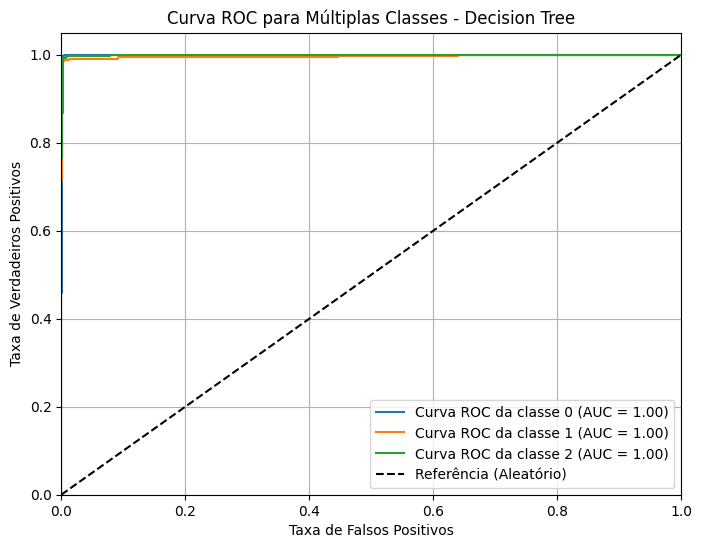

In [ ]:
class_names = modelDT.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsDT = modelDT.predict(x_test)

accuracyDT = accuracy_score(y_test, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y_test, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.9957575757575757

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9935    0.9991    0.9963      1068
           1     0.9947    0.9964    0.9956      1126
           2     0.9991    0.9919    0.9955      1106

    accuracy                         0.9958      3300
   macro avg     0.9958    0.9958    0.9958      3300
weighted avg     0.9958    0.9958    0.9958      3300



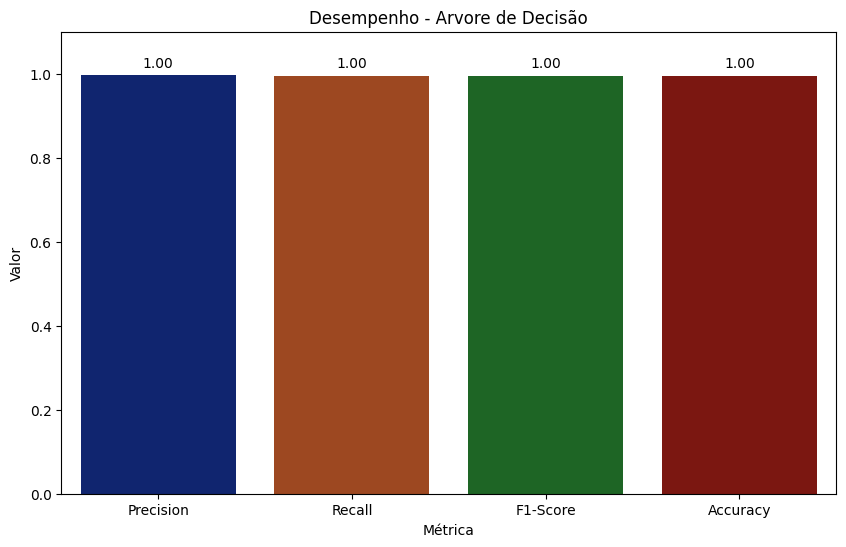

In [ ]:
y_pred = predictsDT
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_dt = df_metricas.copy()
df_metrics_dt.insert(loc=0, column='Modelo', value='Arvore de Decisão')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

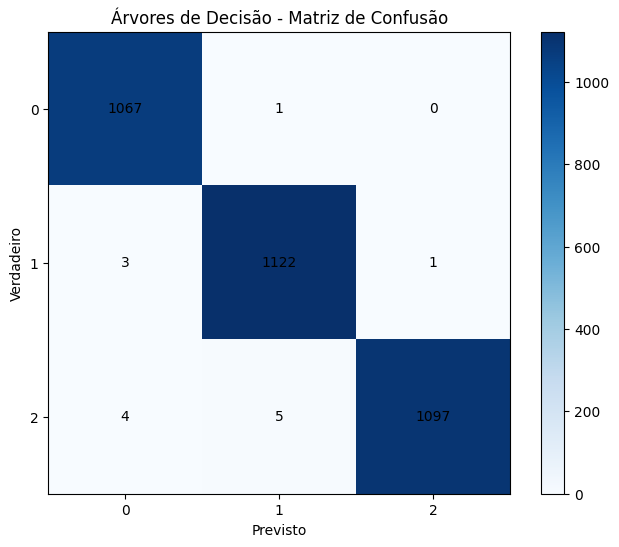

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Árvores de Decisão - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(
  n_estimators=100,
  criterion='entropy',
  min_samples_split=2,
  min_samples_leaf=1,
  random_state=42
)

modelRF.fit(x_train, y_train)

nome_modelo = "Random Forest"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelRF, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_RF = scores
print(f'Scores validação cruzada MLP: {scores_RF}')
print(f'Média dos scores: {scores_RF.mean()}')
print(f'Desvio padrão dos scores: {scores_RF.std()}')



Scores validação cruzada MLP: [0.99696859 0.99514707 0.99939394 0.99696969 0.99818182 0.99878788
 0.99818071 1.         0.99878714 0.99878714]
Média dos scores: 0.9981203978785945
Desvio padrão dos scores: 0.0013412056784003782


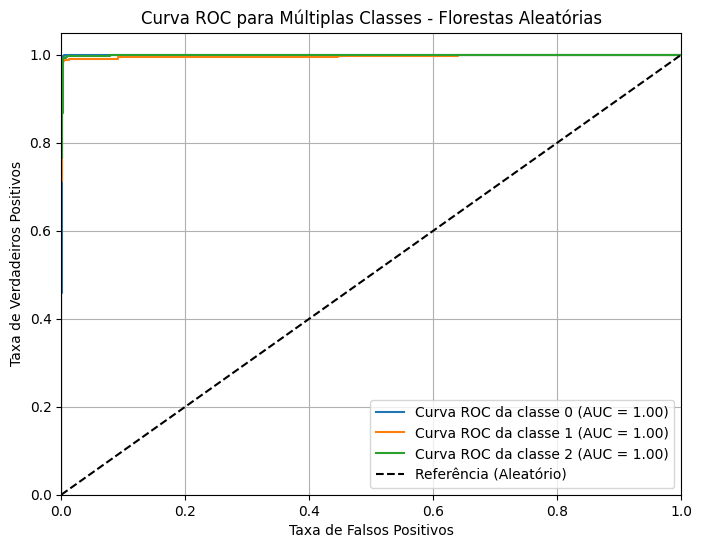

In [ ]:
class_names = modelRF.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Florestas Aleatórias')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsRF = modelRF.predict(x_test)

accuracyRF = accuracy_score(y_test, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y_test, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.9981818181818182

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9972    1.0000    0.9986      1068
           1     0.9973    0.9973    0.9973      1126
           2     1.0000    0.9973    0.9986      1106

    accuracy                         0.9982      3300
   macro avg     0.9982    0.9982    0.9982      3300
weighted avg     0.9982    0.9982    0.9982      3300



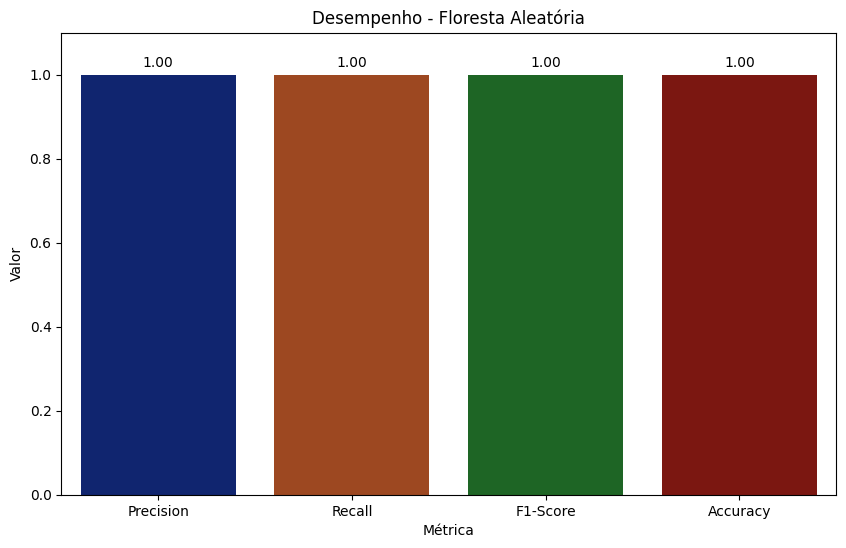

In [ ]:
y_pred = predictsRF
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_rf = df_metricas.copy()
df_metrics_rf.insert(loc=0, column='Modelo', value='Floresta Aleatória')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Floresta Aleatória')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
previsoes_algoritmos['Floresta Aleatória'] = y_pred

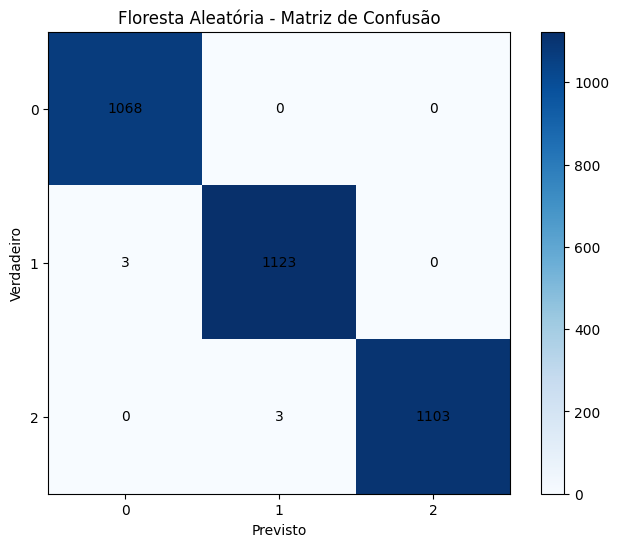

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Floresta Aleatória - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42, verbose=True)

svm.fit(x_train, y_train)

nome_modelo = "SVM"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(svm, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_SVM = scores



[LibSVM]

In [ ]:
print(f'Scores validação cruzada SVM: {scores_SVM}')
print(f'Média dos scores: {scores_SVM.mean()}')
print(f'Desvio padrão dos scores: {scores_SVM.std()}')

Scores validação cruzada SVM: [0.99272222 0.98968889 0.99090189 0.99090229 0.99393719 0.99393383
 0.99211339 0.99028578 0.99332708 0.9939313 ]
Média dos scores: 0.9921743857032268
Desvio padrão dos scores: 0.0015461048650850138


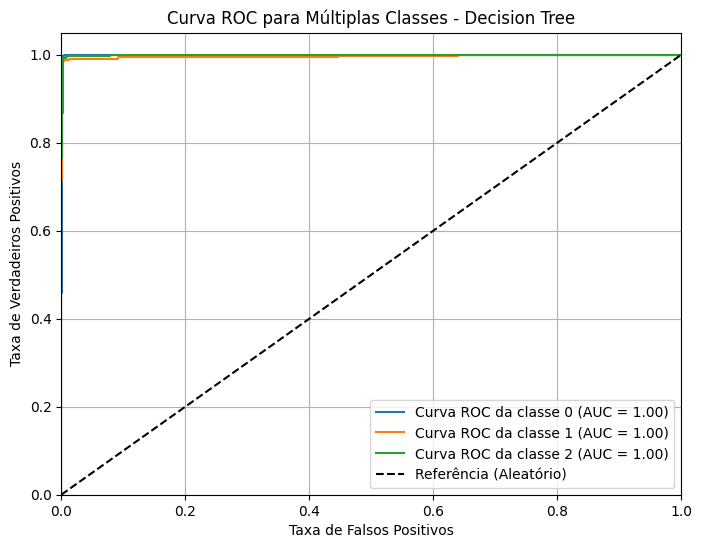

In [ ]:
class_names = svm.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsSVM = svm.predict(x_test)

accuracySVM = accuracy_score(y_test, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')

reportSVM = classification_report(y_test, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.9915151515151515

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9935    1.0000    0.9967      1068
           1     0.9946    0.9813    0.9879      1126
           2     0.9865    0.9937    0.9901      1106

    accuracy                         0.9915      3300
   macro avg     0.9915    0.9917    0.9916      3300
weighted avg     0.9915    0.9915    0.9915      3300



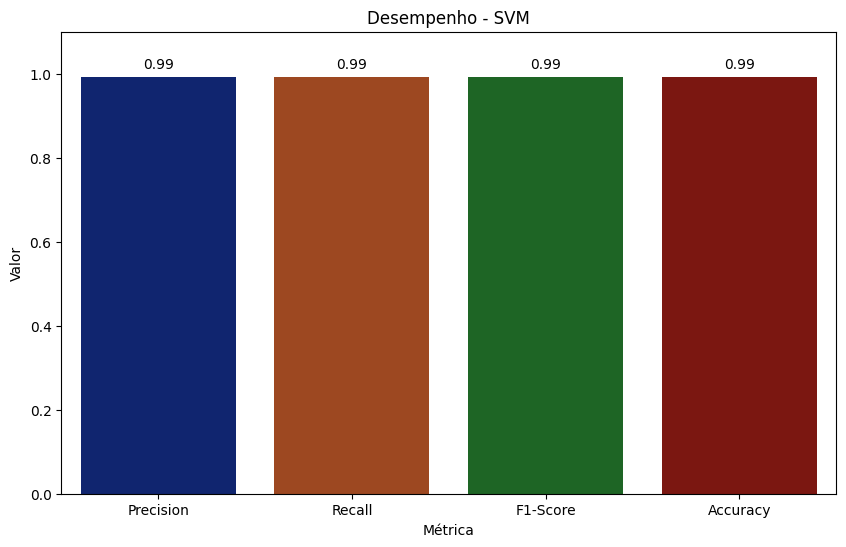

In [ ]:
y_pred = predictsSVM
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_svm = df_metricas.copy()
df_metrics_svm.insert(loc=0, column='Modelo', value='SVM')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
previsoes_algoritmos['SVM'] = y_pred

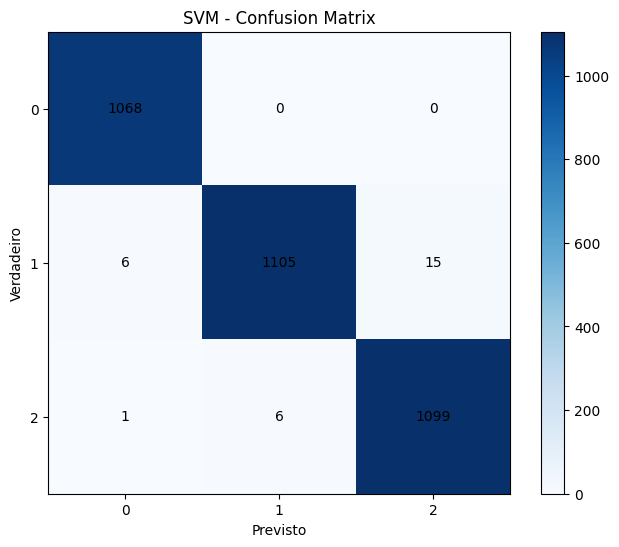

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
adb.fit(x_train, y_train)

nome_modelo = "AdaBoost"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(adb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_adb = scores


print(f'Scores validação cruzada adaBoost: {scores_adb}')
print(f'Média dos scores: {scores_adb.mean()}')
print(f'Desvio padrão dos scores: {scores_adb.std()}')

Scores validação cruzada adaBoost: [0.98304993 0.98610183 0.98666977 0.98788242 0.99090724 0.96324566
 0.98728419 0.99031445 0.98787681 0.98666134]
Média dos scores: 0.9849993632857155
Desvio padrão dos scores: 0.007541597645437275


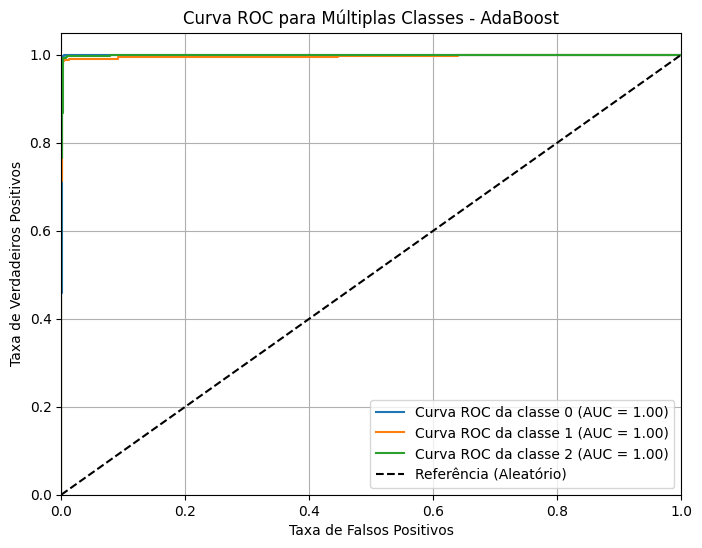

In [ ]:
class_names = adb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictions_adb = adb.predict(x_test)
print(classification_report(y_test, predictions_adb))

accuracyadb = accuracy_score(y_test, predictions_adb)
print(f'Precisão do modelo de AdaBoost: {accuracyadb}')

reportadb = classification_report(y_test, predictions_adb, digits=4)
print(f'\nRelatório de Classificação:\n{reportadb}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       0.99      0.99      0.99      1126
           2       0.99      0.99      0.99      1106

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300

Precisão do modelo de AdaBoost: 0.9921212121212121

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9953    0.9953    0.9953      1068
           1     0.9885    0.9885    0.9885      1126
           2     0.9928    0.9928    0.9928      1106

    accuracy                         0.9921      3300
   macro avg     0.9922    0.9922    0.9922      3300
weighted avg     0.9921    0.9921    0.9921      3300



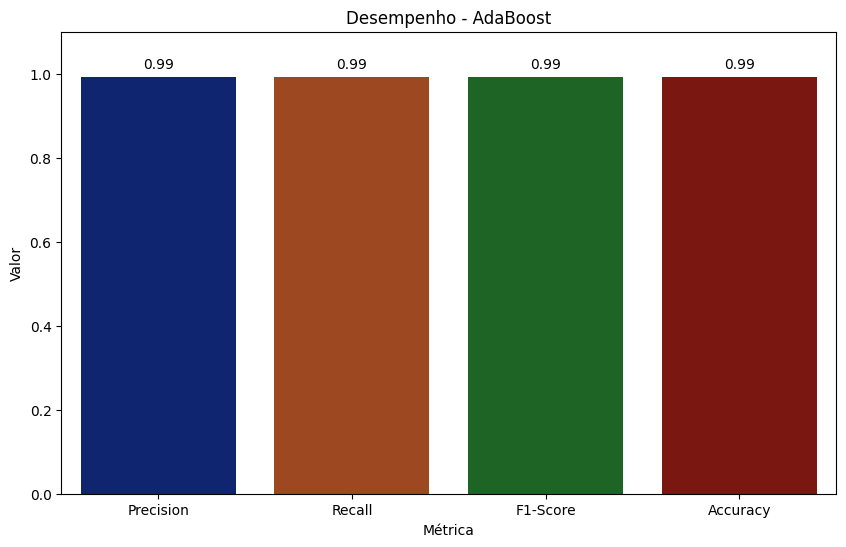

In [ ]:
y_pred = predictions_adb
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_adb = df_metricas.copy()
df_metrics_adb.insert(loc=0, column='Modelo', value='AdaBoost')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - AdaBoost')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
previsoes_algoritmos['AdaBoost'] = y_pred

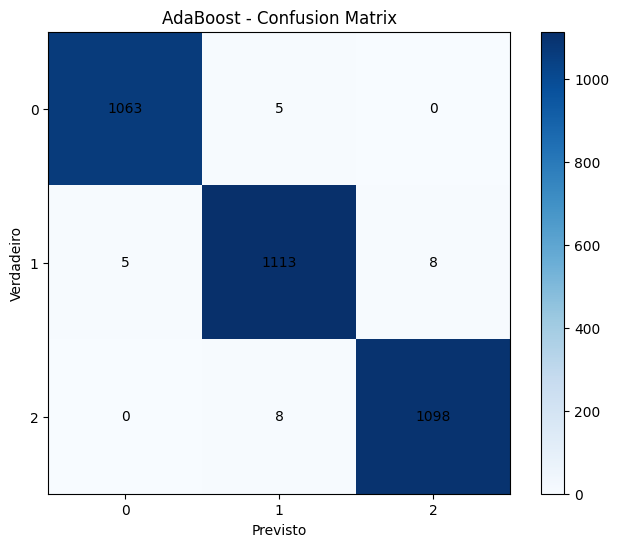

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('AdaBoost - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
def create_dataset(data, look_back=1):
   X, y = [], []
   for i in range(len(data)-look_back-1):
       a = data[i:(i+look_back), 0]
       X.append(a)
       y.append(data[i + look_back, 0])
   return np.array(X), np.array(y)


look_back = 10
X, y = create_dataset(x, look_back)

In [ ]:
X_gru = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
scaler_ts = StandardScaler()
scaler_ts.fit(x[:, 0].reshape(-1, 1))

,copy,True
,with_mean,True
,with_std,True


In [ ]:
model_gru_ts = Sequential()
model_gru_ts.add(GRU( 50 , return_sequences= True , input_shape=(look_back, 1 )))
model_gru_ts.add(GRU( 50 ))
model_gru_ts.add(Dense( 1 ))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_gru_ts.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_gru_ts.fit(X_gru, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.8334
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.7751
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.7918
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7859
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.8252
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.8078
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7811
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7392
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7660
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7791
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7942
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7311
Epoch 13/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7720
Epoch 14/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7833
Epoch 15/100
516/516 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
predictions = model_gru_ts.predict(X)
predictions = scaler_ts.inverse_transform(predictions)
y_actual = scaler_ts.inverse_transform([y])

516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

def make_gru_model(input_shape, num_classes, dropout_rate=0.5):

    model = Sequential()
    model.add(GRU(units=128,
                  input_shape=input_shape,
                  return_sequences=False,
                  implementation=2)) 

    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    return model

print("\n\n---------------------------------------------")
print("INICIANDO VALIDAÇÃO CRUZADA MANUAL PARA GRU")
print("---------------------------------------------")

model_gru_name = "GRU"
n_folds = 10

gru_scores_temp = {nome_metrica: [] for nome_metrica in metricas_scoring.keys()}
input_shape = x_train_lstm.shape[1:]

for fold_no, (train_index, val_index) in enumerate(tqdm(kf.split(x_train_lstm, y_train_lstm), total=n_folds, desc=f"Folds do {model_gru_name}")):
    X_train_fold, X_val_fold = x_train_lstm[train_index], x_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    model_gru = make_gru_model(input_shape, num_classes)

    model_gru.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy'],
    )

    model_gru.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=32, verbose=1)

    y_pred_probs = model_gru.predict(X_val_fold, verbose=0)
    y_pred_labels = np.argmax(y_pred_probs, axis=1) 
    y_true_labels = np.squeeze(Y_val_fold) 

    gru_scores_temp['Accuracy'].append(accuracy_score(y_true_labels, y_pred_labels))
    gru_scores_temp['Precision'].append(precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['Recall'].append(recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['F1-Score'].append(f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))



for nome_metrica in metricas_scoring.keys():
    all_scores_cv[nome_metrica][model_gru_name] = np.array(gru_scores_temp[nome_metrica])

print("\nValidação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.")

modelGRU_final = make_gru_model(input_shape, num_classes)
modelGRU_final.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

print("\nTreinando modelo GRU final...")
modelGRU_final.fit(x_train_lstm, y_train_lstm, epochs=50, batch_size=32, callbacks=callbacks, validation_split=0.2, verbose=0)

test_loss_gru, test_acc_gru = modelGRU_final.evaluate(x_test_lstm, y_test_lstm, verbose=0)
print(f"Acurácia final do GRU no teste: {test_acc_gru:.4f}")

modelGRU_final.save('best_model_gru.keras')
modelGRU = modelGRU_final 

y_pred_probs_gru = modelGRU.predict(x_test_lstm)
y_pred_gru = np.argmax(y_pred_probs_gru, axis=1)
previsoes_algoritmos['GRU'] = y_pred_gru

print("Modelo GRU final treinado e salvo como 'modelGRU'.")



---------------------------------------------
INICIANDO VALIDAÇÃO CRUZADA MANUAL PARA GRU
---------------------------------------------


Folds do GRU:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.8159 - loss: 0.5157
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9358 - loss: 0.1923
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9580 - loss: 0.1447
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9667 - loss: 0.1176
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9711 - loss: 0.1052
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9710 - loss: 0.1027
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9699 - loss: 0.0996
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9762 - loss: 0.0882
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9757 - loss: 0.0953
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9756 - loss: 0.0805
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9730 - loss: 0.0908
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  10%|█         | 1/10 [19:09<2:52:28, 1149.83s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.8099 - loss: 0.5219
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9412 - loss: 0.1891
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9610 - loss: 0.1330
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9677 - loss: 0.1193
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9708 - loss: 0.1085
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9712 - loss: 0.0996
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9719 - loss: 0.1048
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9739 - loss: 0.0873
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9778 - loss: 0.0680
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9796 - loss: 0.0617
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9775 - loss: 0.0659
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  20%|██        | 2/10 [37:22<2:28:48, 1116.01s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.8108 - loss: 0.5178
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9446 - loss: 0.1727
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9669 - loss: 0.1201
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9668 - loss: 0.1120
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9738 - loss: 0.0987
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9737 - loss: 0.0934
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9726 - loss: 0.0985
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9757 - loss: 0.0857
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9770 - loss: 0.0835
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9755 - loss: 0.0811
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9746 - loss: 0.0838
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  30%|███       | 3/10 [54:22<2:05:04, 1072.13s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.8203 - loss: 0.5286
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9466 - loss: 0.1632
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9541 - loss: 0.1463
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9662 - loss: 0.1175
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9717 - loss: 0.1090
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9674 - loss: 0.1110
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9747 - loss: 0.0894
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9752 - loss: 0.0893
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9785 - loss: 0.0846
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9752 - loss: 0.0831
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9783 - loss: 0.0748
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  40%|████      | 4/10 [1:10:55<1:44:05, 1040.92s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8034 - loss: 0.5384
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9451 - loss: 0.1713
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9602 - loss: 0.1361
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9644 - loss: 0.1323
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9723 - loss: 0.0995
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9730 - loss: 0.0951
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9723 - loss: 0.1035
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9738 - loss: 0.0971
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9763 - loss: 0.0859
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9775 - loss: 0.0764
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9790 - loss: 0.0721
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  50%|█████     | 5/10 [1:28:48<1:27:43, 1052.73s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.7979 - loss: 0.5276
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9371 - loss: 0.1875
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9597 - loss: 0.1446
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9665 - loss: 0.1220
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9646 - loss: 0.1179
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9713 - loss: 0.0984
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9720 - loss: 0.0940
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9721 - loss: 0.0866
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - accuracy: 0.9741 - loss: 0.0864
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9766 - loss: 0.0806
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9783 - loss: 0.0708
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  60%|██████    | 6/10 [1:48:38<1:13:16, 1099.17s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.8156 - loss: 0.5171
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9407 - loss: 0.1890
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9588 - loss: 0.1555
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9647 - loss: 0.1218
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9695 - loss: 0.1088
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9678 - loss: 0.1185
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9713 - loss: 0.0990
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9745 - loss: 0.0852
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9721 - loss: 0.0909
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9706 - loss: 0.0947
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9735 - loss: 0.0900
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  70%|███████   | 7/10 [2:07:47<55:46, 1115.64s/it]  

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.8135 - loss: 0.5122
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9439 - loss: 0.1721
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9651 - loss: 0.1313
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9658 - loss: 0.1237
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9655 - loss: 0.1168
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9720 - loss: 0.1019
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9734 - loss: 0.0985
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9718 - loss: 0.0911
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9717 - loss: 0.0912
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9784 - loss: 0.0772
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9779 - loss: 0.0785
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  80%|████████  | 8/10 [2:25:56<36:54, 1107.06s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.7724 - loss: 0.5416
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9392 - loss: 0.1766
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9539 - loss: 0.1524
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9628 - loss: 0.1256
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9617 - loss: 0.1170
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9683 - loss: 0.1182
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9700 - loss: 0.1038
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9724 - loss: 0.0923
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9670 - loss: 0.0971
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9771 - loss: 0.0707
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9719 - loss: 0.0908
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  90%|█████████ | 9/10 [2:43:25<18:08, 1088.87s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.8025 - loss: 0.5298
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9337 - loss: 0.1880
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9590 - loss: 0.1353
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9619 - loss: 0.1258
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9685 - loss: 0.1124
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9709 - loss: 0.1016
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9713 - loss: 0.1064
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9746 - loss: 0.0910
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9760 - loss: 0.0846
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9773 - loss: 0.0839
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9786 - loss: 0.0739
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU: 100%|██████████| 10/10 [3:01:48<00:00, 1090.86s/it]
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Validação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.

Treinando modelo GRU final...
Restoring model weights from the end of the best epoch: 39.
Acurácia final do GRU no teste: 0.9948
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Modelo GRU final treinado e salvo como 'modelGRU'.


In [ ]:
dt_test = pd.DataFrame(all_scores_cv)
dt_test.tail()

,Accuracy,Precision,Recall,F1-Score
Decision Tree,"[0.9951515151515151, 0.9951515151515151, 0.996...","[0.9951591428504589, 0.9945475620860471, 0.996...","[0.9945454545454545, 0.9945454545454545, 0.996...","[0.9945437811318698, 0.9945426711338521, 0.996..."
Random Forest,"[0.996969696969697, 0.9951515151515151, 0.9993...","[0.996971876813197, 0.9951558103732017, 0.9993...","[0.996969696969697, 0.9951515151515151, 0.9993...","[0.9969685890271412, 0.9951470672654454, 0.999..."
SVM,"[0.9927272727272727, 0.9896969696969697, 0.990...","[0.9927379988633795, 0.9898016565147756, 0.990...","[0.9927272727272727, 0.9896969696969697, 0.990...","[0.9927222181387619, 0.9896888894659517, 0.990..."
AdaBoost,"[0.983030303030303, 0.9860606060606061, 0.9866...","[0.9830900083018472, 0.9862813170638266, 0.986...","[0.983030303030303, 0.9860606060606061, 0.9866...","[0.9830499340737221, 0.9861018250007653, 0.986..."
GRU,"[0.9924242424242424, 0.9992424242424243, 0.990...","[0.9924576220694141, 0.9992440747342709, 0.990...","[0.9924242424242424, 0.9992424242424243, 0.990...","[0.9924155536437642, 0.999242396351586, 0.9909..."


In [ ]:
previsoes_df = pd.DataFrame(previsoes_algoritmos)
previsoes_df.tail()

,LSTM,MLP,Floresta Aleatória,SVM,AdaBoost,GRU
3295,0,0,0,0,0,0
3296,0,0,0,0,0,0
3297,0,0,0,0,0,0
3298,1,1,1,1,1,1
3299,2,2,2,2,2,2


In [ ]:
all_metrics_algorithm = pd.concat([df_metrics_lstm,df_metrics_mlp,df_metrics_dt, df_metrics_rf, df_metrics_svm, df_metrics_adb])
all_metrics_algorithm.head()

,Modelo,Métrica,Valor
0,MLP,Precision,0.992731
1,MLP,Recall,0.992727
2,MLP,F1-Score,0.992720
3,MLP,Accuracy,0.992727
0,Arvore de Decisão,Precision,0.995770


In [ ]:
data_metrics = all_metrics_algorithm.reset_index(drop=True)

In [ ]:
data_metrics.to_csv('/poseiddon/GROUP A/CONFIGURATION 4/metricas_algoritmos.csv')
previsoes_df.to_csv('/poseiddon/GROUP A/CONFIGURATION 4/previsoes_algoritmos.csv')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

modelos = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

scores_f1_por_algoritmo = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

In [ ]:
data_score = pd.DataFrame(all_scores_cv)
data_score.head()

,Accuracy,Precision,Recall,F1-Score
LSTM,0.996969696969697,0.9969709650748505,0.996969696969697,0.9969686602852078
MLP,"[0.9939393939393939, 0.9860606060606061, 0.994...","[0.9939523924131579, 0.9969685890271412, 0.995...","[0.9915151515151515, 0.9939393939393939, 0.987...","[0.9957569846786611, 0.98666580892505, 0.99029..."
Naive Bayes,"[0.8606060606060606, 0.8648484848484849, 0.873...","[0.8779077591692697, 0.8779296797096247, 0.886...","[0.8606060606060606, 0.8648484848484849, 0.873...","[0.8613068418755705, 0.8653866610211705, 0.874..."
Decision Tree,"[0.9951515151515151, 0.9951515151515151, 0.996...","[0.9951591428504589, 0.9945475620860471, 0.996...","[0.9945454545454545, 0.9945454545454545, 0.996...","[0.9945437811318698, 0.9945426711338521, 0.996..."
Random Forest,"[0.996969696969697, 0.9951515151515151, 0.9993...","[0.996971876813197, 0.9951558103732017, 0.9993...","[0.996969696969697, 0.9951515151515151, 0.9993...","[0.9969685890271412, 0.9951470672654454, 0.999..."


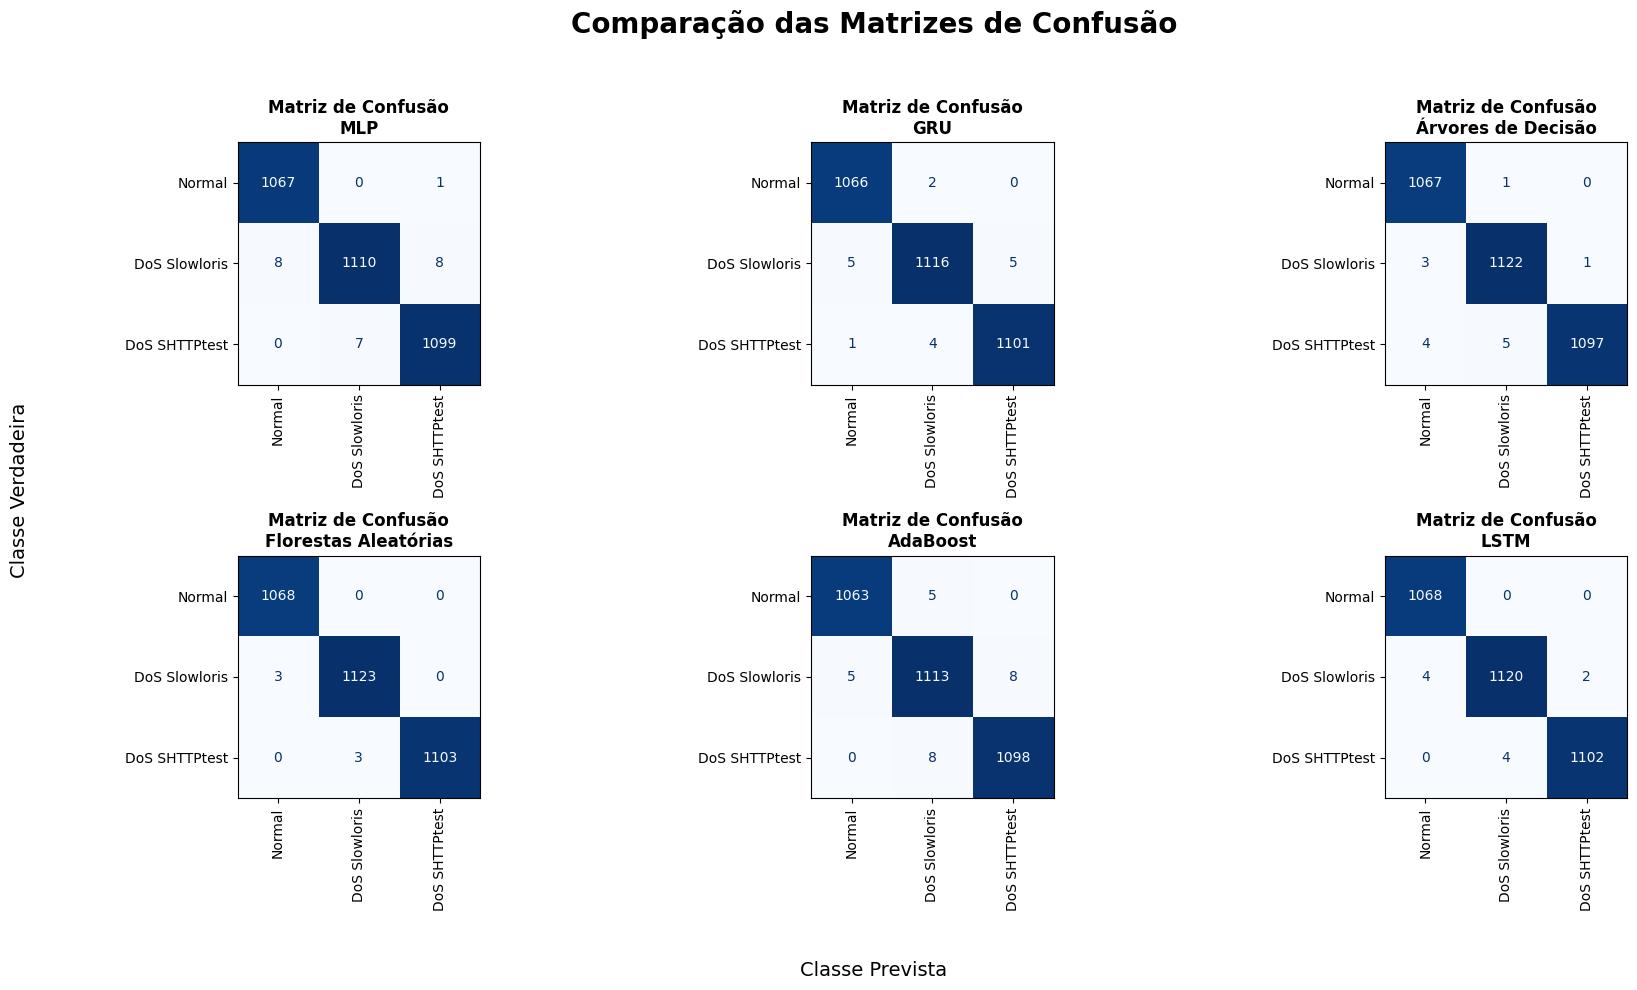

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "MLP": modelMLP,
    "GRU": modelGRU, 
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

nomes_classes = ['Normal', 'DoS Slowloris', 'DoS SHTTPtest']

x_test_sklearn = x_test 
x_test_lstm = x_test_lstm 

predicoes = {}

for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_probs = modelo.predict(x_test_lstm, verbose=0)
        predicoes[nome] = np.argmax(y_pred_probs, axis=1)

    else:
        predicoes[nome] = modelo.predict(x_test_sklearn)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

y_true_labels_1d = np.squeeze(y_test_lstm)

for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):

    if hasattr(modelo, 'classes_'):
        model_classes = modelo.classes_
    else: 
        model_classes = np.arange(len(nomes_classes))

    cm = confusion_matrix(y_true_labels_1d, predicoes[nome_modelo], labels=model_classes)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')

    ax.set_title(f"Matriz de Confusão\n{nome_modelo}", fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.supxlabel('Classe Prevista', fontsize=14)
fig.supylabel('Classe Verdadeira', fontsize=14)
fig.suptitle("Comparação das Matrizes de Confusão", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import logging

# Configuração de logs
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

modelos = {
    "MLP": modelMLP,
    "GRU": model_gru, 
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}

x_test_sklearn = x_test
x_test_lstm = x_test_lstm
y_test_reais = y_test

class_names = np.unique(y_test_reais)
y_test_bin = label_binarize(y_test_reais, classes=class_names)

plt.figure(figsize=(12, 10))

cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for i, (nome_modelo, modelo) in enumerate(modelos.items()):

    y_pred_prob = None

    if nome_modelo in ["LSTM", "GRU"]:
        y_pred_prob = modelo.predict(x_test_lstm, verbose=0)
    elif hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(x_test_sklearn)
    else:
        logging.warning(f"O modelo {nome_modelo} foi ignorado por não possuir método de probabilidades.")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        color=cores[i % len(cores)], 
        lw=3, 
        label=f'ROC {nome_modelo} (AUC = {roc_auc:.4f})' 
    )

plt.plot(
    [0, 1],
    [0, 1],
    color='gray',
    lw=2,
    linestyle='--',
    label='Reference (Random)'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Comparison of the ROC (Micro-Average) Curve between Models', fontsize=18, fontweight='bold')
plt.legend(loc="lower right", fontsize=11, title="Models ML and DL")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
from scipy.stats import sem, t 

def calcular_ic_95(dados):
    dados = np.array(dados)

    if dados.size < 2:
        return 0

    return t.ppf(0.995, dados.size - 1) * sem(dados)


metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores_globais = all_scores_cv

plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) # Cria o i-ésimo subplot
    scores_da_metrica_atual = scores_globais[metrica]

    for nome_modelo, scores in scores_da_metrica_atual.items():

        scores = np.array(scores)

        if scores.size == 0:
             continue

        media = np.mean(scores)
        ic = calcular_ic_95(scores) 

        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    if not dados_plot:
        plt.title(f"Dados indisponíveis para {metrica}", fontsize=16)
        continue

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5, lw=1.5)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', # Usando 4 casas decimais para precisão
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', fontsize=11, fontweight='bold')


    plt.title(f"Comparação de {metrica}", fontsize=18, fontweight='bold')
    plt.ylim(0, 1.05) 
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average (CV)", fontsize=13)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

In [ ]:
metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]

plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) # Cria o i-ésimo subplot

    scores_da_metrica_atual = all_scores_cv[metrica]

    dados_plot = []
    for nome_modelo, scores in scores_da_metrica_atual.items():
        media = np.mean(scores)
        ic = calcular_ic_95(scores)
        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5)

    for j, p in enumerate(ax.patches):
        media_valor = p.get_height()

        ic_valor = df_plot['IC'].iloc[j]

        ax.annotate(f'{media_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points',
                    fontsize=10, fontweight='bold')

        ax.annotate(f'± {ic_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor), 
                    ha='center', va='center',
                    xytext=(0, 25), textcoords='offset points', 
                    fontsize=9, color='red', fontweight='bold')

    plt.title(f"{metrica} comparison", fontsize=16)
    plt.ylim(0, 1.15) 
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
joblib.dump(modelMLP, '/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_mlp.joblib')
joblib.dump(svm, '/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_svm.joblib')
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_lstm.h5')
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_lstm.keras')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_gru.h5')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_gru.keras')
joblib.dump(modelDT, '/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_dt.joblib')
joblib.dump(modelRF, '/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_rf.joblib')
joblib.dump(adb, '/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_adb.joblib')

In [ ]:
modelLSTM_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_lstm.keras')
modelGRU_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 4/CICIDS2017_gru.keras')

In [ ]:
converter_lstm = tf.lite.TFLiteConverter.from_keras_model(modelLSTM_carregado_keras)
converter_gru = tf.lite.TFLiteConverter.from_keras_model(modelGRU_carregado_keras)

In [ ]:
converter_lstm.optimizations = [tf.lite.Optimize.DEFAULT]
converter_gru.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
tflite_model_lstm = converter_lstm.convert()
tflite_model_gru = converter_gru.convert()


# Teste do modelo treinado com CIC2017 no dataset CIC 2018

In [ ]:
%run '/poseiddon/GROUP A/CONFIGURATION 4/conf04_CIC2018_script.ipynb'